<a href="https://colab.research.google.com/github/williamdavidona/MachineLearning-SupervisedLearning/blob/main/Adaboost_vs_Decision_Tree_vs_Random_Forest_World_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**World Optimization**

Name:William Ona

#Data preprocessing

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
data = pd.read_csv('Sport car price.csv')
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
data.select_dtypes(include='object').nunique()

Car Make                    38
Car Model                  176
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

delete comma from price

In [5]:
data['Price (in USD)']=data['Price (in USD)'].str.replace(',','')
#convert the variable to integer
data['Price (in USD)']=data['Price (in USD)'].astype(int)


In [6]:
data['Price (in USD)'].dtypes

dtype('int64')

In [7]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [8]:
data.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)              int64
dtype: object

In [9]:
data['0-60 MPH Time (seconds)'] =data['0-60 MPH Time (seconds)'].str.replace(',','')


In [10]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [11]:
if data['Horsepower'].dtype == 'object':
  data['Horsepower'] = data['Horsepower'].str.replace('[^0-9]+','',regex=True)
  data['Horsepower'] = data['Horsepower'].apply(lambda x: int(x) if x != '' else 0)
else:
  pass

In [12]:
if data['Torque (lb-ft)'].dtype == 'object':
    # remove strings from the Column A column
    data['Torque (lb-ft)'] = data['Torque (lb-ft)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    data['Torque (lb-ft)'] = data['Torque (lb-ft)'].fillna(0)
    data['Torque (lb-ft)'] = data['Torque (lb-ft)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

In [13]:
if data['0-60 MPH Time (seconds)'].dtype == 'object':
    # remove strings from the Column A column
    data['0-60 MPH Time (seconds)'] = data['0-60 MPH Time (seconds)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    data['0-60 MPH Time (seconds)'] = data['0-60 MPH Time (seconds)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

In [14]:
data.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                  int64
Torque (lb-ft)              int64
0-60 MPH Time (seconds)     int64
Price (in USD)              int64
dtype: object

In [15]:
data['Horsepower'] = data['Horsepower'].astype(int)
data['Torque (lb-ft)'] = data['Torque (lb-ft)'].astype(int)
data['0-60 MPH Time (seconds)'] = data['0-60 MPH Time (seconds)'].astype(float)

In [16]:
data.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

In [17]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,28.0,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,32.0,142700
4,McLaren,720S,2021,4,710,568,27.0,298000


Change engine size into integer

In [18]:
data['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [19]:
def clasification_engine_size (engine_size):
  if engine_size in ['Electric', 'Hybrid']:
    return 'Electric/Hybrid'
  elif engine_size in ['Electric Motor', 'Electric (tri-motor)','Electric (93 kWh)', 'Electric (100 kWh)', '2.0 (Electric)']:
    return 'Electric'
  elif engine_size == '1.5 + Electric':
    return 'Hybrid'
  elif engine_size in ['Hybrid (4.0)', '4.0 (Hybrid)']:
    return '4.0 Hybrid'
  elif engine_size == '0':
    return 'Unknown'
  elif engine_size == '-':
    return 'Unknown'
  elif float(engine_size) < 2:
    return 'Small'
  elif float(engine_size) < 3:
    return 'Medium'
  else:
    return 'Large'

  

In [20]:
data['Engine Size (L)'] = data['Engine Size (L)'].apply(clasification_engine_size)

In [21]:
data['Engine Size (L)'].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', 'Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

<Axes: >

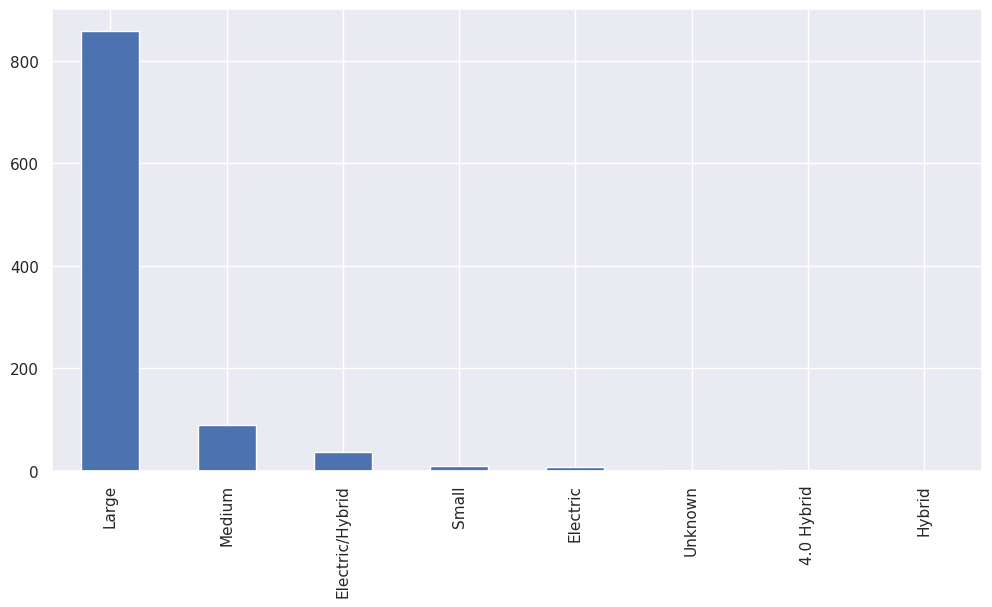

In [23]:
plt.figure(figsize=(12,6))
data['Engine Size (L)'].value_counts().plot(kind='bar')

In [24]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,Large,379,331,4.0,101200
1,Lamborghini,Huracan,2021,Large,630,443,28.0,274390
2,Ferrari,488 GTB,2022,Large,661,561,3.0,333750
3,Audi,R8,2022,Large,562,406,32.0,142700
4,McLaren,720S,2021,Large,710,568,27.0,298000


In [25]:
data.drop(columns='Car Model', inplace=True)
data.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,28.0,274390
2,Ferrari,2022,Large,661,561,3.0,333750
3,Audi,2022,Large,562,406,32.0,142700
4,McLaren,2021,Large,710,568,27.0,298000


In [26]:
data['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [27]:
def  segment_car_make(value):
  if value in ['Porsche','Lamborghini','Ferrari','McLaren','Aston Martin','Bugatti','Koenigsegg','Lotus','Maserati','Alfa Romeo','Bentley', 'Mercedez-AMG','Pagani','Pininfarnia']:
    return 'Luxury'
  if value in ['Audi', 'BMW','Mercedez-Benz','Chevrolet','Ford','Nissan','Dodge','Jaguar','Lexus','Mazda','Rolls-Royce','Tesla','Toyota','Kia']:
    return 'Mainstream'
  if value in ['Ariel','W Motors', 'Shelby', 'TVR', 'Subaru','Alpine','Ultima']:
    return 'Speciality'
  else:
    return 'Other'

In [28]:
data['Car Make']= data['Car Make'].apply(segment_car_make)

<Axes: >

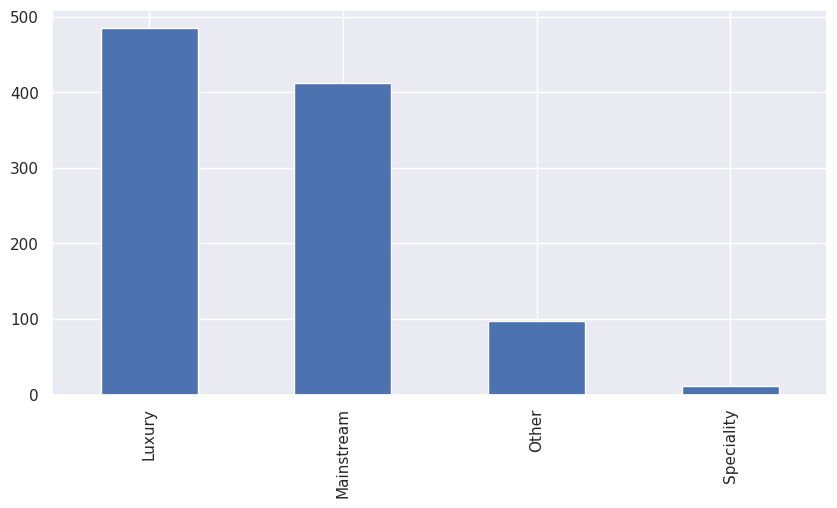

In [29]:
plt.figure(figsize=(10,5))
data['Car Make'].value_counts().plot(kind='bar')

In [30]:
data.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Mainstream,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


<bound method Figure.tight_layout of <Figure size 2000x1000 with 2 Axes>>

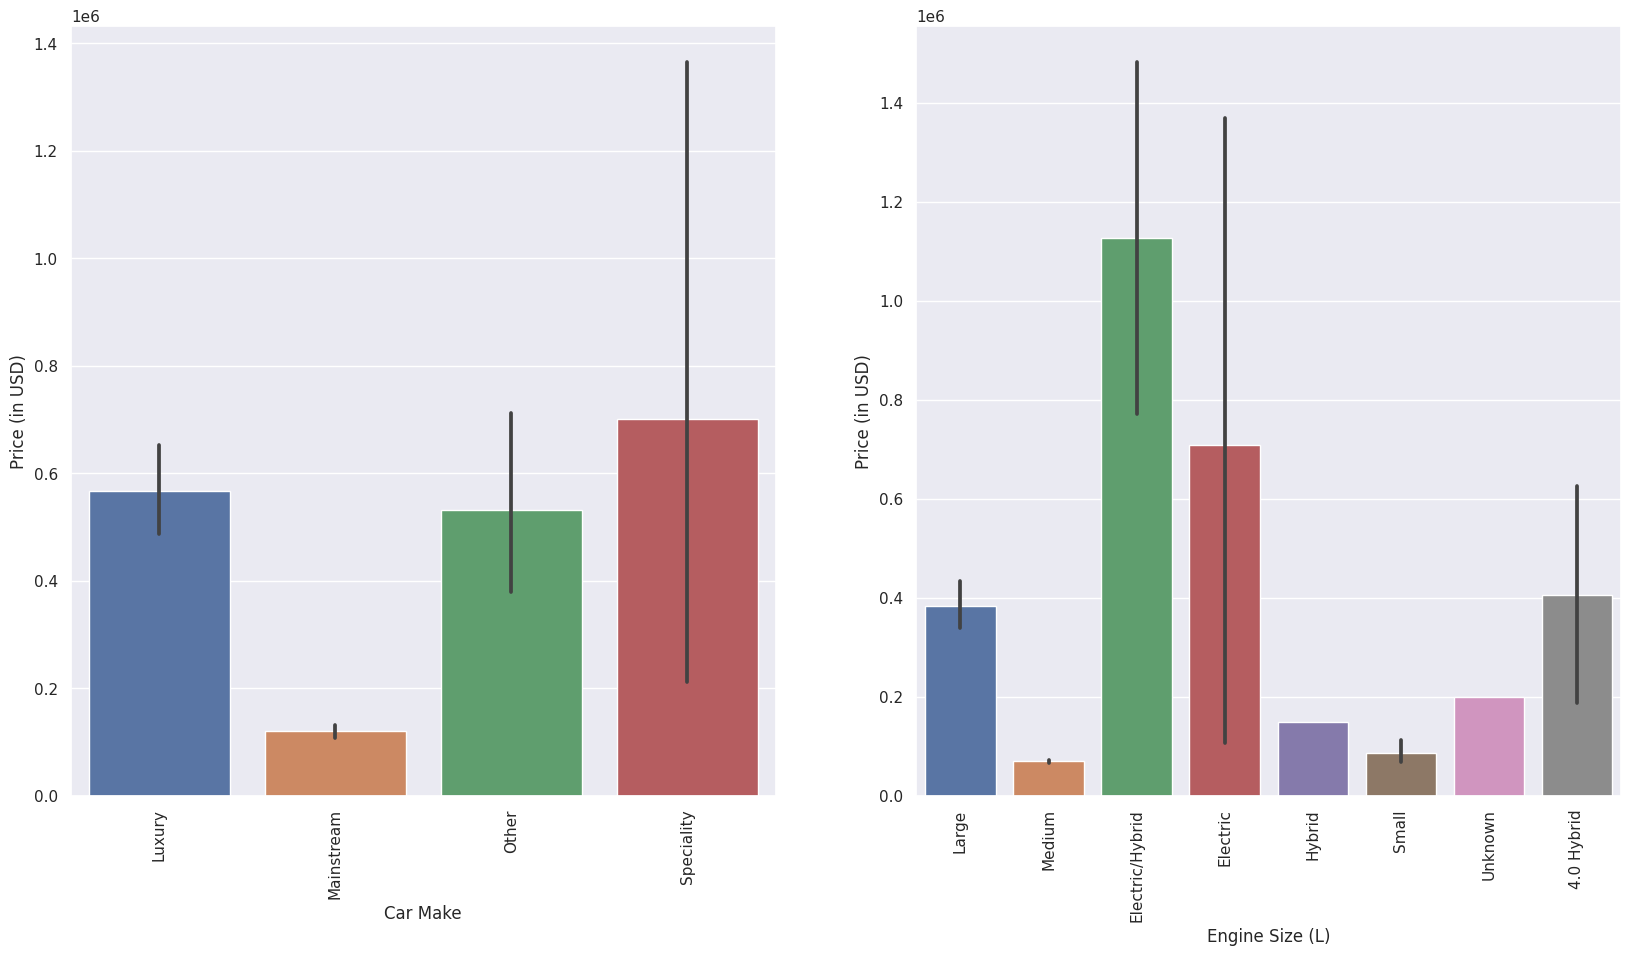

In [31]:
cat_vars = ['Car Make','Engine Size (L)']

fig, axs = plt.subplots(nrows=1, ncols=2 , figsize=(20,10))
axs =axs.flatten()

for i,var in enumerate(cat_vars):
  sns.barplot(x=var, y='Price (in USD)', data=data, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout

In [32]:
num_var= ['Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)']

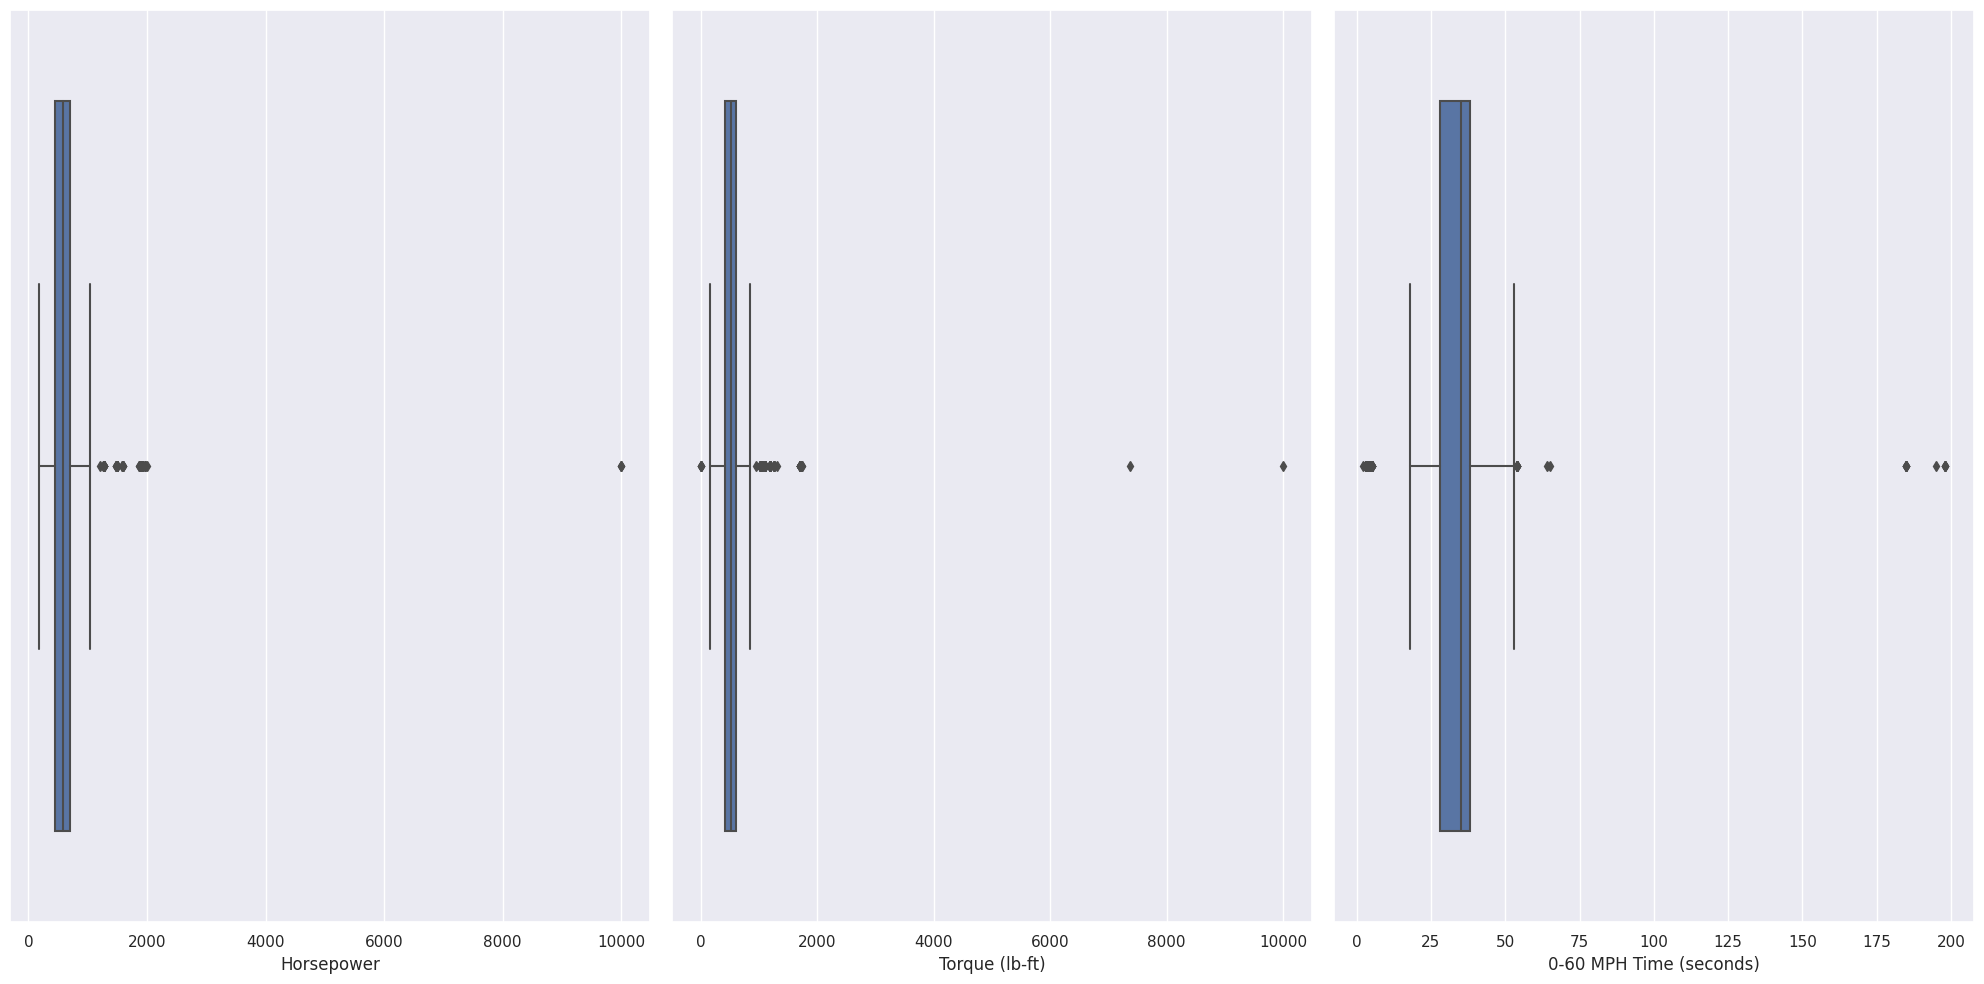

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_var):
  sns.boxplot(x=var, data=data, ax=axs[i])
fig.tight_layout()
plt.show()


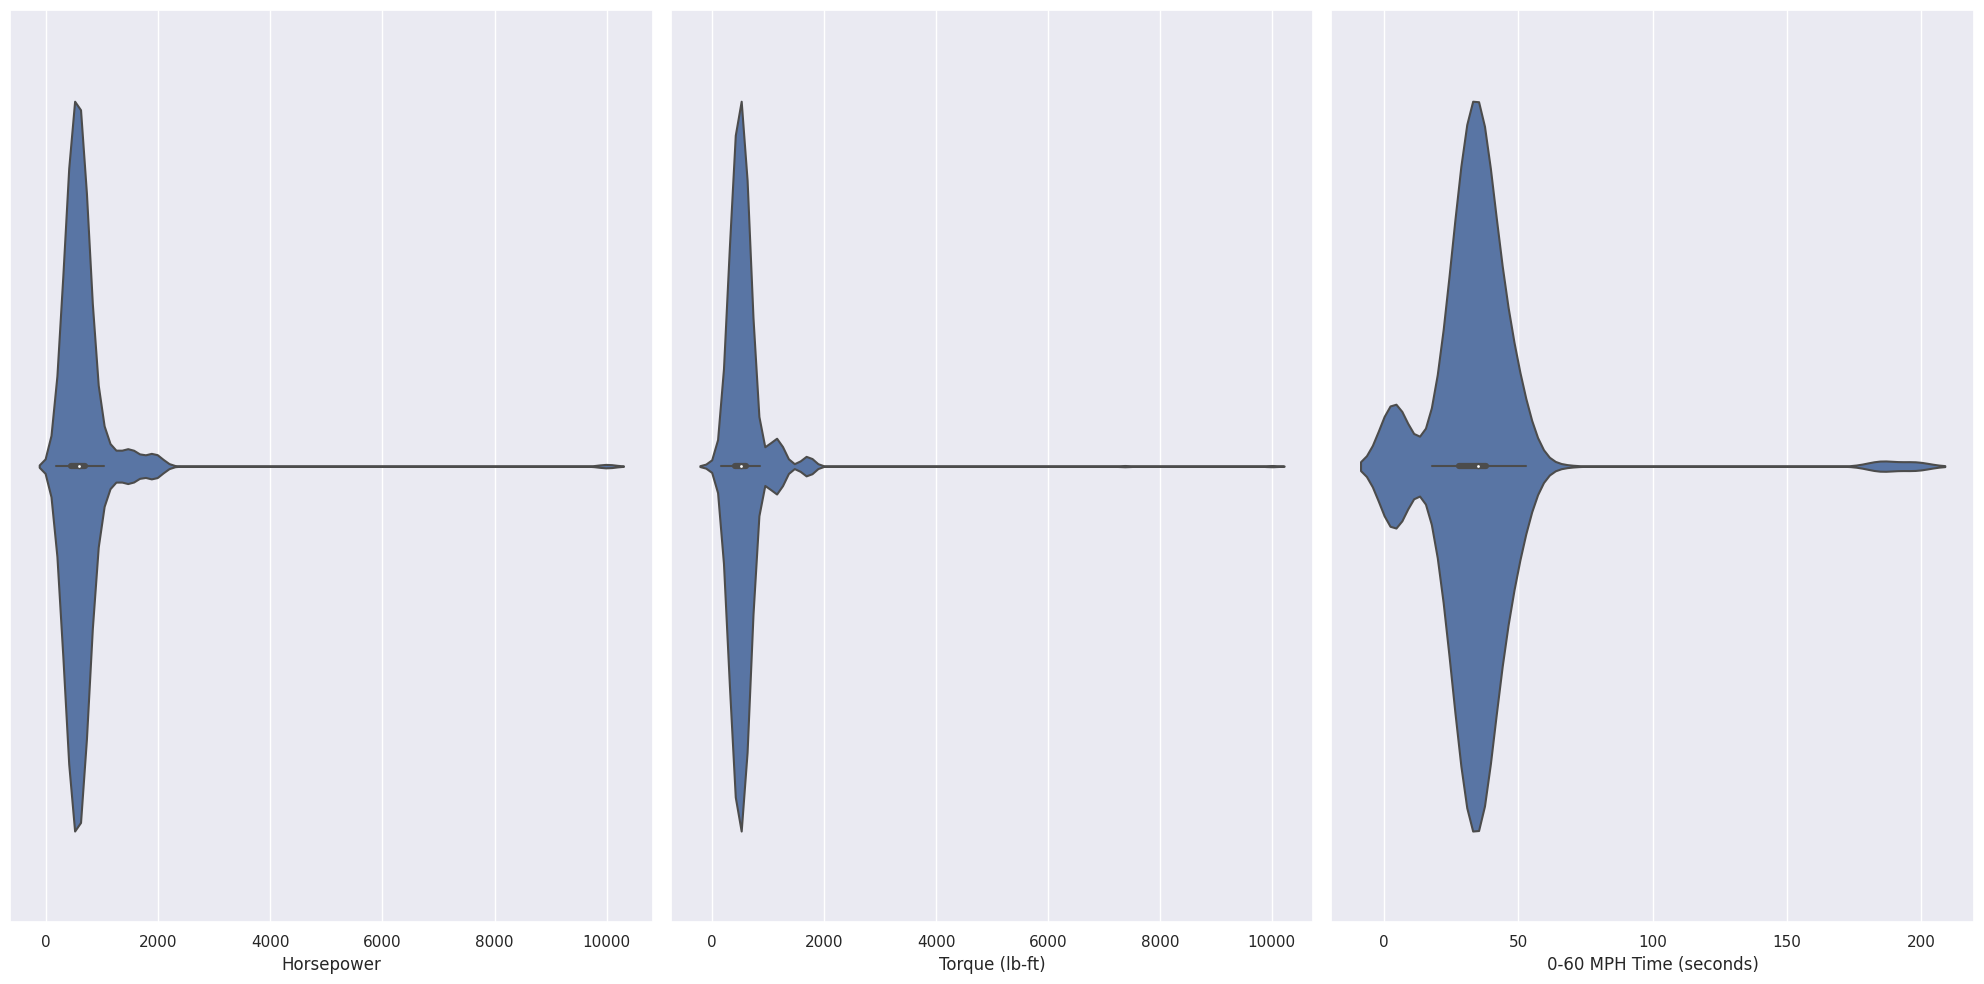

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_var):
  sns.violinplot(x=var, data=data, ax=axs[i])
fig.tight_layout()
plt.show()


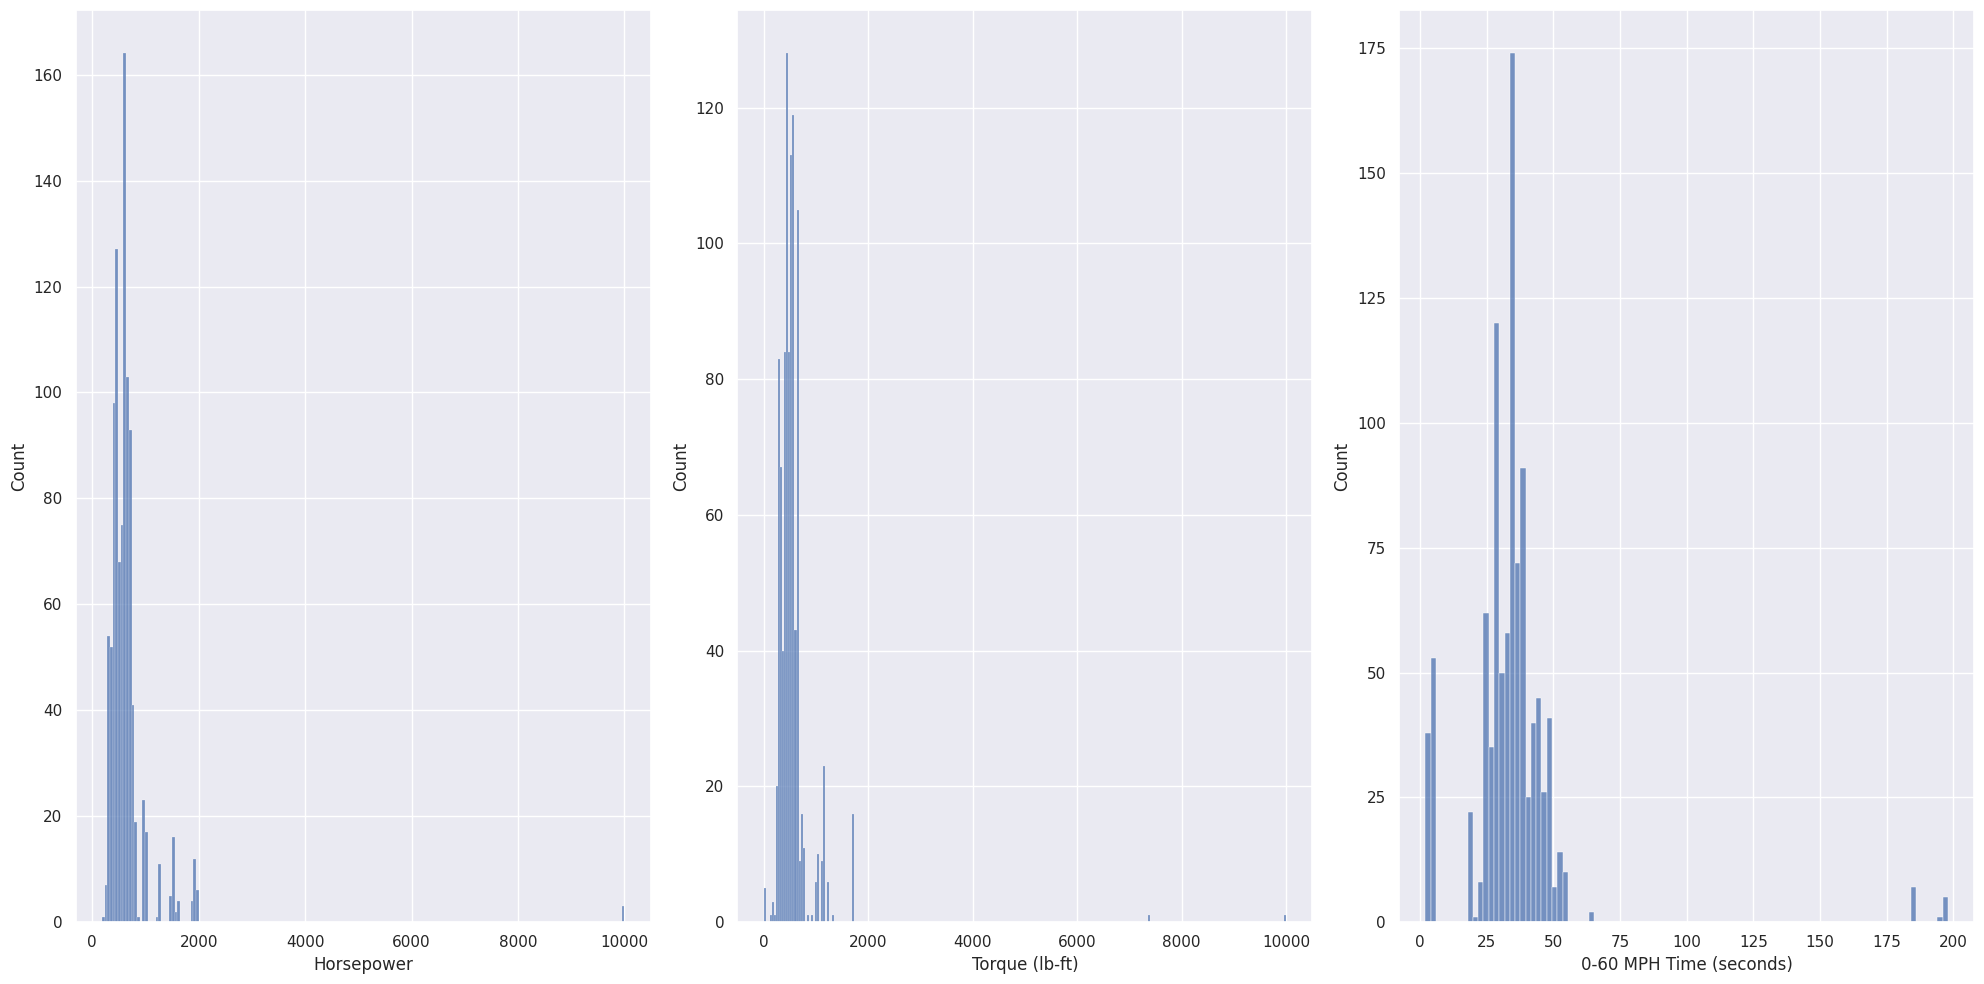

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_var):
  sns.histplot(x=var, data=data, ax=axs[i])
fig.tight_layout()
plt.show()


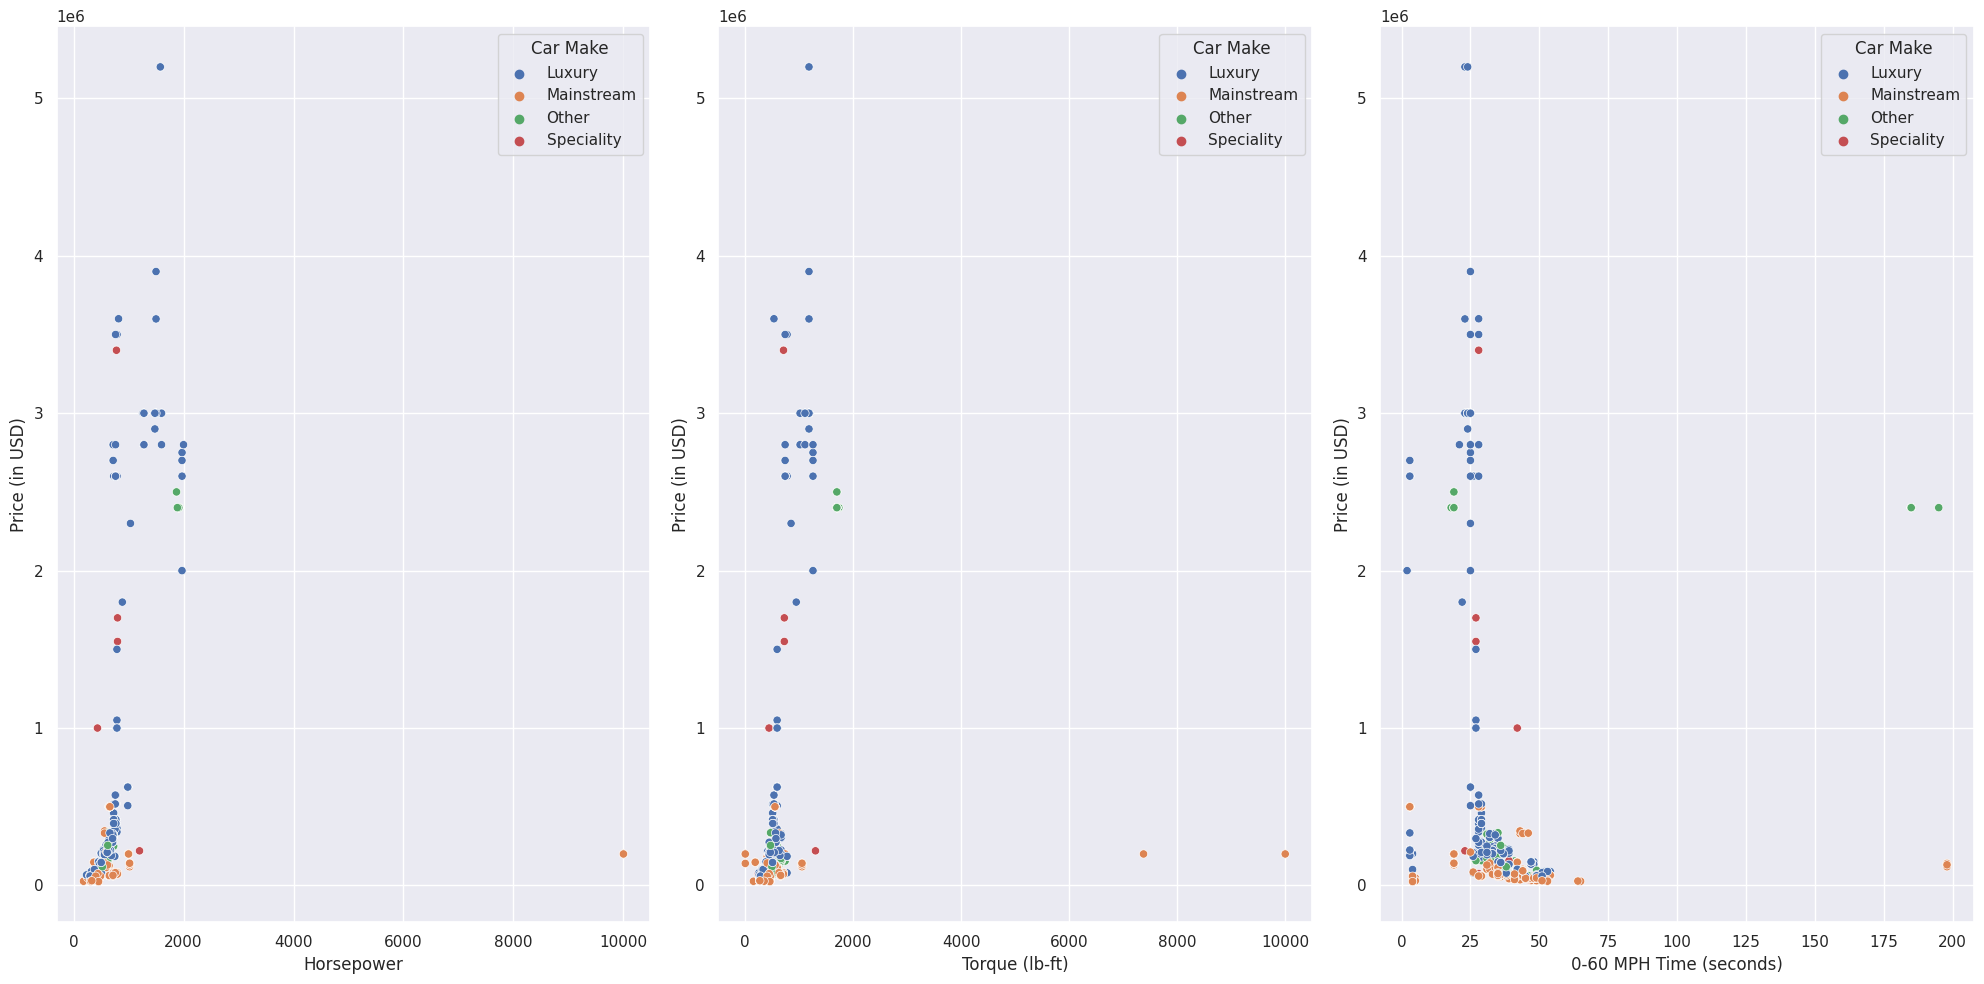

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_var):
  sns.scatterplot(x=var,y= 'Price (in USD)',hue='Car Make', data=data, ax=axs[i])
fig.tight_layout()
plt.show()


<ipython-input-37-0f7bfcb4f8db>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y = 'Price (in USD)', hue = 'Car Make', data= data, ci=None, estimator='mean', alpha=0.7 )


<function matplotlib.pyplot.show(close=None, block=None)>

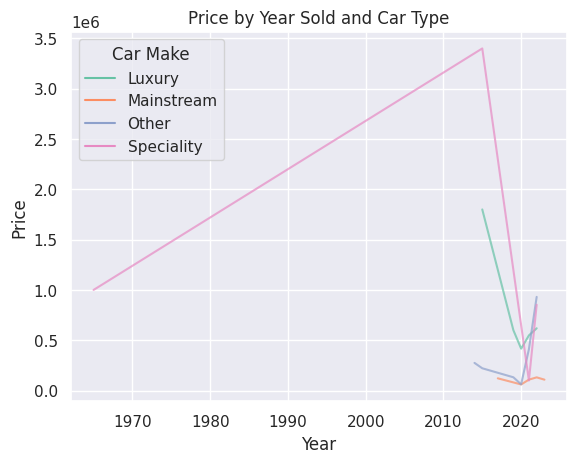

In [37]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='Year', y = 'Price (in USD)', hue = 'Car Make', data= data, ci=None, estimator='mean', alpha=0.7 )
plt.title('Price by Year Sold and Car Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show

#Data Analytic

In [38]:
data.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Mainstream,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


In [39]:
check_missing = data.isnull().sum()*100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

##Label Encoding

In [40]:
for col in data.select_dtypes(include=['object']).columns:
  print(f'{col}: {data[col].unique()}')

Car Make: ['Luxury' 'Mainstream' 'Other' 'Speciality']
Engine Size (L): ['Large' 'Medium' 'Electric/Hybrid' 'Electric' 'Hybrid' 'Small' 'Unknown'
 '4.0 Hybrid']


In [41]:
from sklearn import preprocessing

In [42]:
for col in data.select_dtypes(include=['object']).columns:
  label_encoder= preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  data[col]= label_encoder.transform(data[col])
  print(f'{col}: {data[col].unique()}')

Car Make: [0 1 2 3]
Engine Size (L): [4 5 2 1 3 6 7 0]


##Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
X = data.drop('Price (in USD)', axis=1)
y= data['Price (in USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
q1 = np.percentile(X_train, 25, axis=0)
q3 = np.percentile(X_train, 75, axis=0)
iqr = q3 - q1

# identify outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.logical_or(X_train < lower_bound, X_train > upper_bound)

# remove the outliers from the training set

y_train = y_train[~np.any(outliers, axis=1)]
y_train.shape

(560,)

In [45]:
import scipy.stats as stats
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = X_train.quantile(q=.25)
Q3 = X_train.quantile(q=.75)
IQR = X_train.apply(stats.iqr)
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
X_train = X_train[~((X_train < (Q1-1.5*IQR)) | (X_train > (Q3+1.5*IQR))).any(axis=1)]
# Calculamos cuantas filas se mantienen
X_train.shape

(560, 6)

In [46]:
X_train.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
767,1,2022,4,444,406,38.0
764,0,2021,4,612,561,34.0
529,2,2021,4,720,590,31.0
252,0,2021,4,592,457,28.0
451,0,2021,4,626,664,33.0


In [47]:
y_train.head()

767     84595
764    235000
529    325000
252    256500
451    220000
Name: Price (in USD), dtype: int64

##Correlation heatmap

<Axes: >

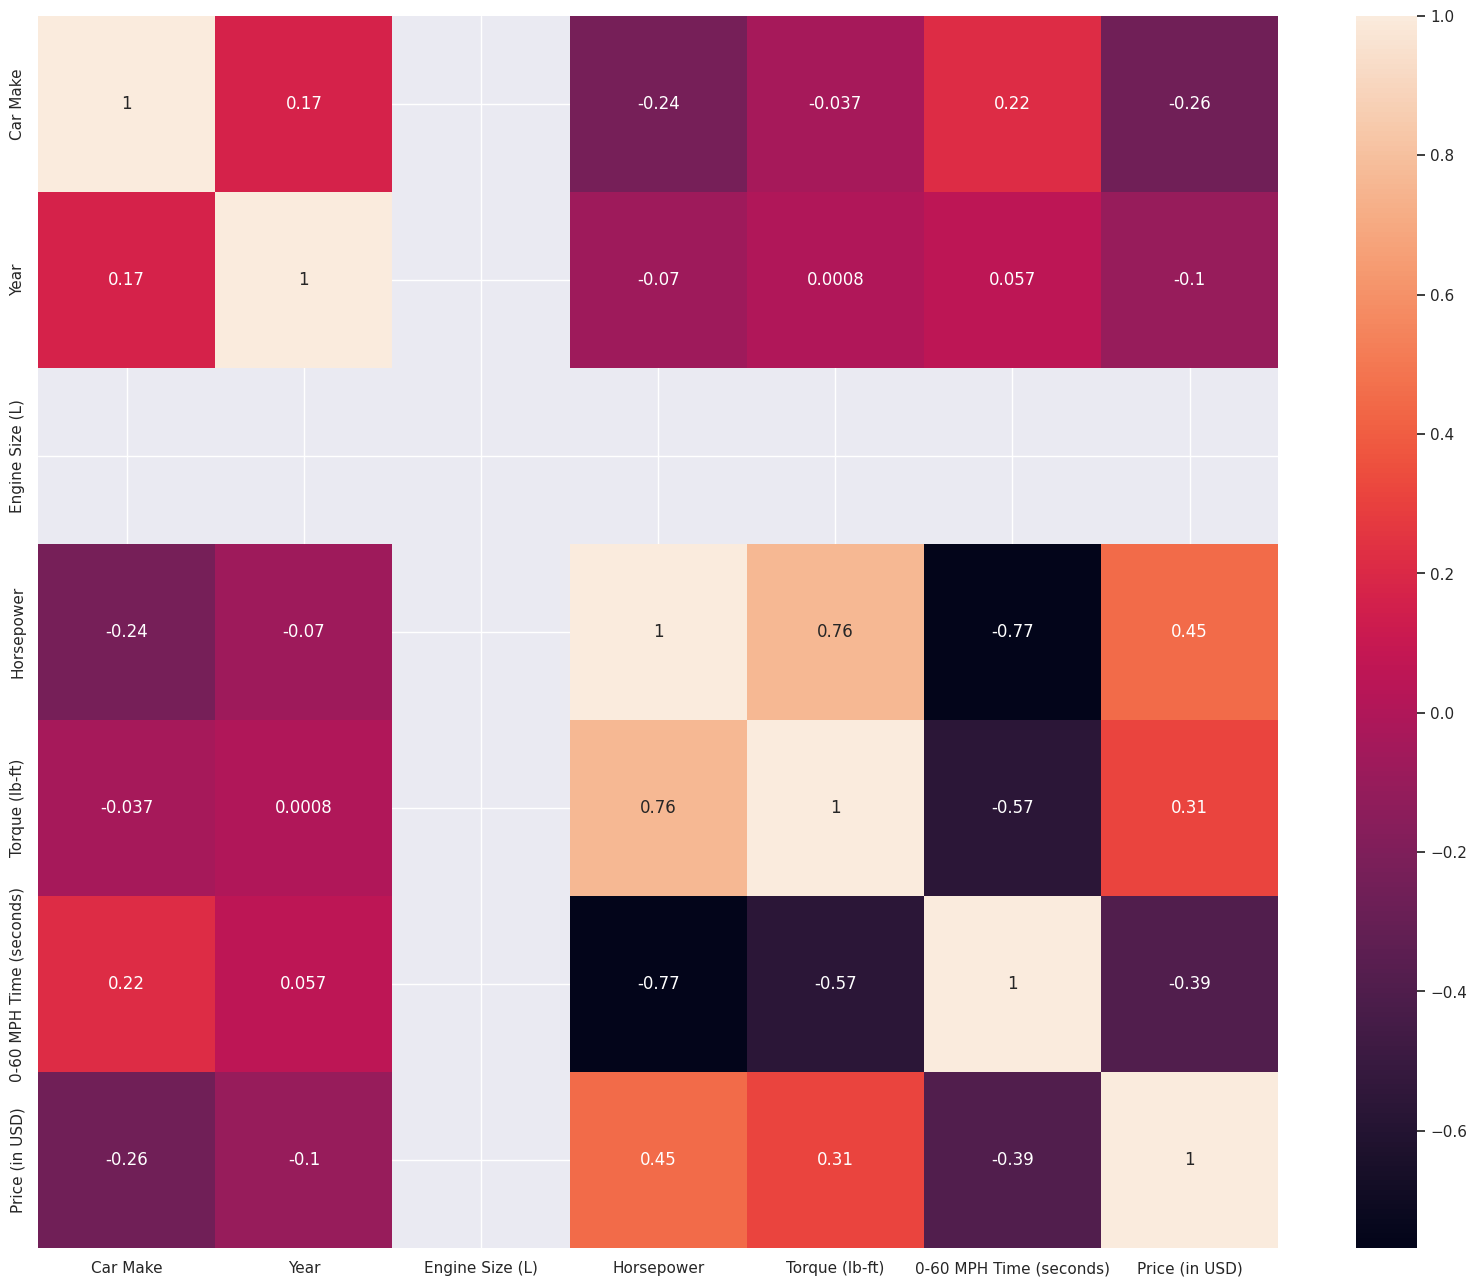

In [48]:
train_data = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True)


In [49]:
X_train.drop(columns='Engine Size (L)', inplace =True)
X_train.head()

,Car Make,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
767,1,2022,444,406,38.0
764,0,2021,612,561,34.0
529,2,2021,720,590,31.0
252,0,2021,592,457,28.0
451,0,2021,626,664,33.0


In [50]:
X_test.drop(columns='Engine Size (L)', inplace =True)
X_test.head()

,Car Make,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
799,0,2021,503,505,35.0
311,1,2021,650,650,35.0
85,0,2022,1500,1180,24.0
435,0,2021,1262,1106,25.0
204,0,2022,325,332,53.0


#Machine Learning Models

##1) Decision Tree Model

###Hypermeters tunning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()
param_grid = { 'max_depth':[2,4,6,8], 'min_samples_split':[2,4,6,8], 'min_samples_leaf':[1,2,3,4], 'max_features': ['auto','sqrt','log2'], 'random_state':[0,42]} 
grid_search = GridSearchCV( dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [52]:
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 0}


###Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 6, random_state= 0)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=6,
                      random_state=0)

In [56]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_percentage_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.6998042221355147
MAPE is 0.6998042221355147
MSE is 393137389418.41614
R2 score is 0.3367722917360797
RMSE score is 627006.6900906371


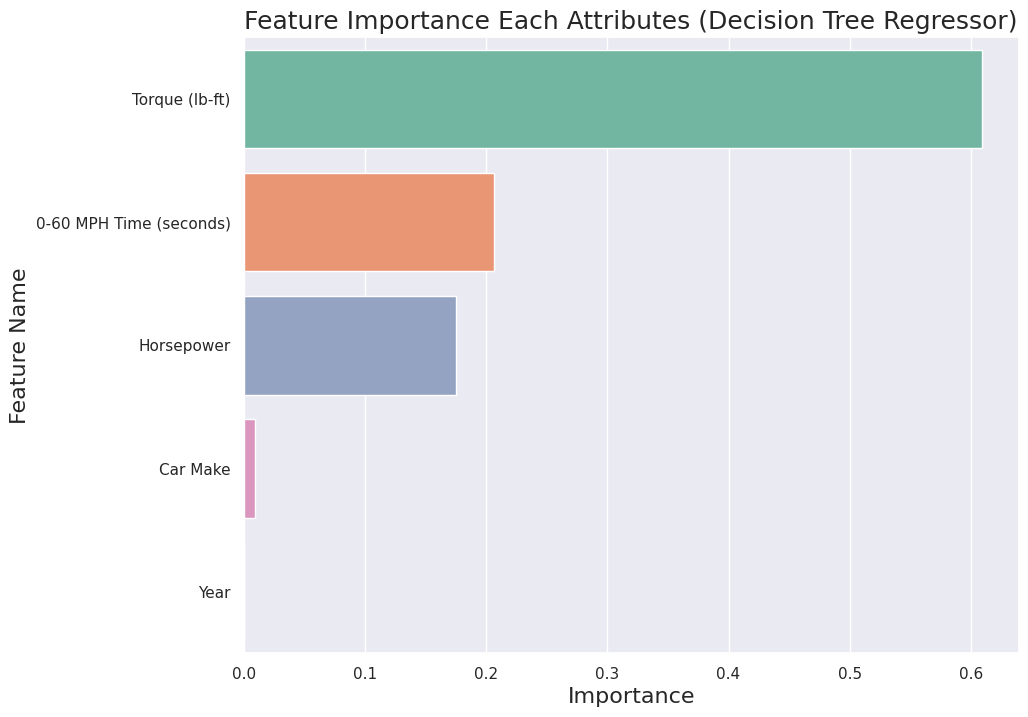

In [58]:
imp_df = pd.DataFrame({'Feature Name': X_train.columns , 'Importance': dtree.feature_importances_})
fi = imp_df.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data= fi2 , x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

In [ ]:
!pip install shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


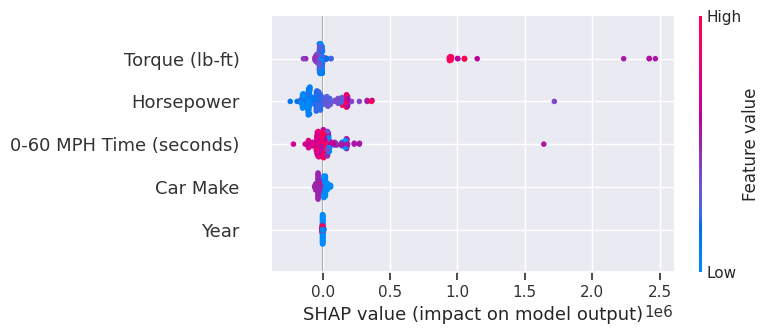

In [61]:
import shap 
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

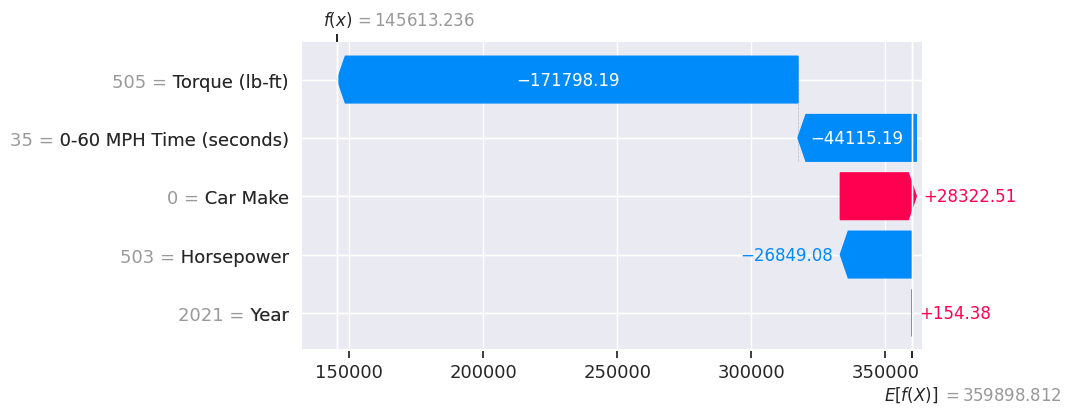

In [62]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

##2)Random Forest Model

###Hypermeters tunning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = { 'max_depth':[3,5,7,9], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4], 'max_features': ['auto','sqrt'], 'random_state':[0,42]} 
grid_search = GridSearchCV( rf, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [65]:
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


###Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( max_depth=7,max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state=0 )
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', random_state=0)

In [67]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_percentage_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.6051691120109134
MAPE is 0.6051691120109134
MSE is 252987440409.1189
R2 score is 0.5732070140407888
RMSE score is 502978.56853857986


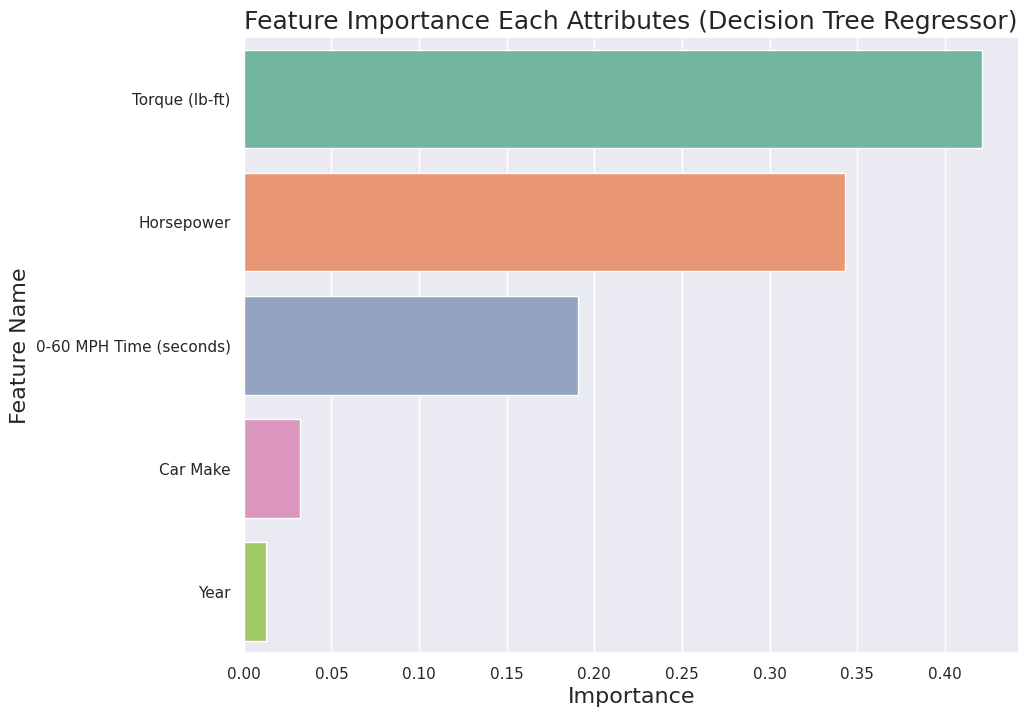

In [68]:
imp_df = pd.DataFrame({'Feature Name': X_train.columns , 'Importance': rf.feature_importances_})
fi = imp_df.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data= fi2 , x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


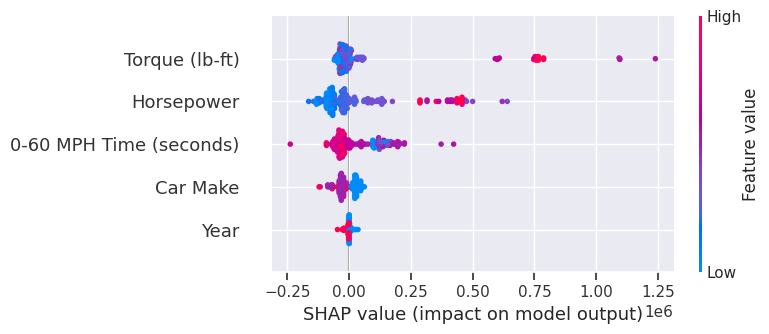

In [69]:
import shap 
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

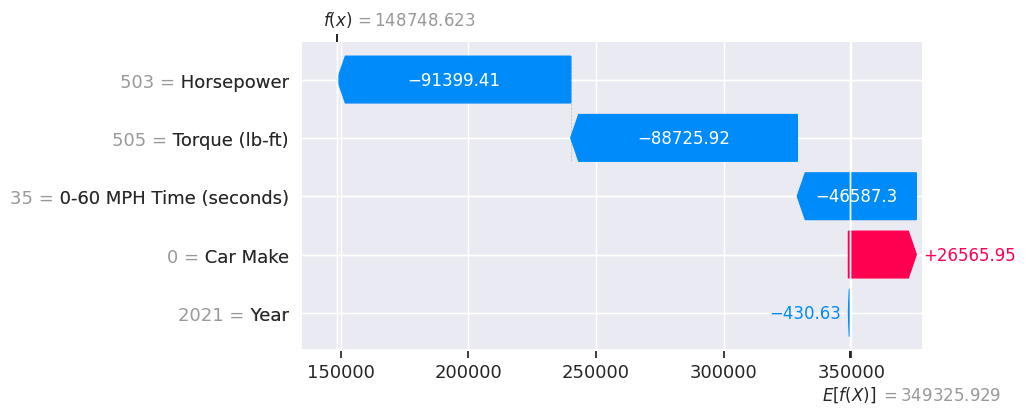

In [70]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

##3)AdaBoost Model

###Hypermeters tunning

In [72]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
abr= AdaBoostRegressor()
params = {'n_estimators': [50,100,150],'learning_rate':[0.01,0.1,1.10],'random_state':[0,42]}
grid_search = GridSearchCV(abr, param_grid = params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.1],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42]},
             scoring='neg_mean_squared_error')

In [73]:
print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}


###AdaBoost Model

In [74]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor(learning_rate=0.1, n_estimators=50, random_state=0)
abr.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [75]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = abr.predict(X_test)
mae = metrics.mean_absolute_percentage_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.9109789075538324
MAPE is 0.9109789075538324
MSE is 325351358225.4272
R2 score is 0.4511281768045038
RMSE score is 570395.7908552861


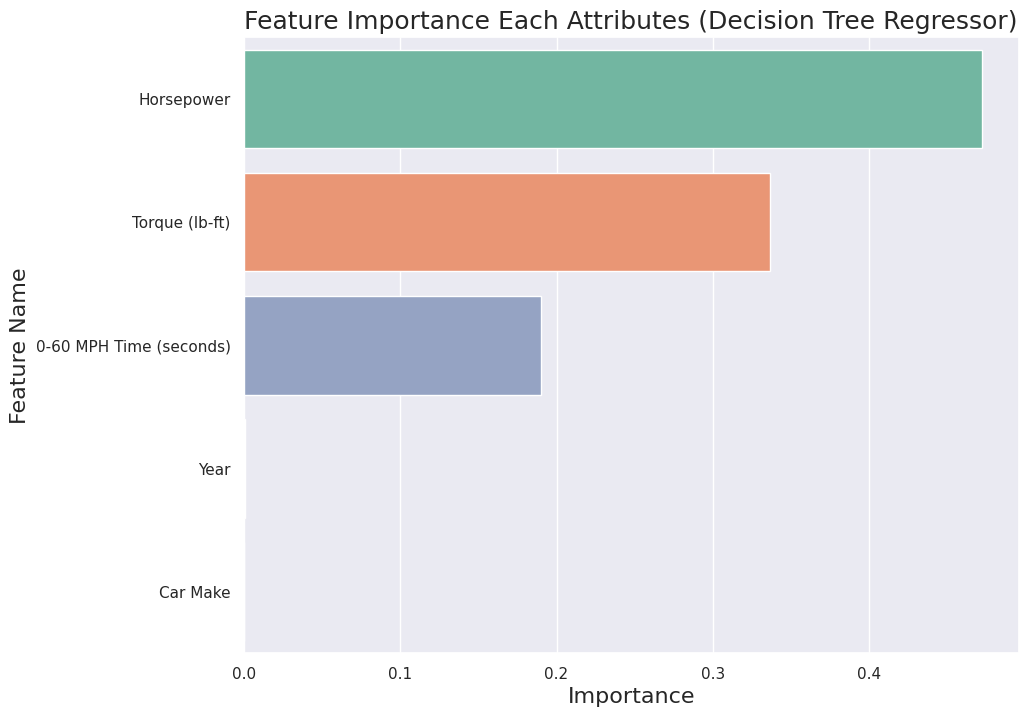

In [76]:
imp_df = pd.DataFrame({'Feature Name': X_train.columns , 'Importance': abr.feature_importances_})
fi = imp_df.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data= fi2 , x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()